In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)
import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Tuesday 22 November 2022, 16:50:06  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

# Résolution d'équations différentielles ordinaires (EDO)

## Prérequis

- les variables
- les tableaux (array)
- les fonctions 
- les tracés
- savoir ce qu'est une dérivée

## Compétences

- Identifier une EDO
- Traduire le problème "mathématique" en code python
- Tracer la solution d'une ode

## Objectifs

- Acquérir les compétences ci-dessus.

- Pourvoir proposer des solutions à des problèmes physico-chimiques simples mettant en jeu une dérivée 


# Qu’est-ce qu’une équation différentielle ordinaire (d'ordre 1) ?

## Commençons par le commencement : les maths !

Attention aux yeux 😵... nous allons commencer par donner la définition mathématique. Mais vous allez voir que derrière cette écriture un peu complexe, il y a des concepts assez simples à comprendre à condition de savoir ce qu'est une dérivée. Voici donc l'écriture d'une équation différentielle ordinaire d'ordre 1  \:


$$ \dfrac{df(x)}{dx}=g(f(x),x) $$

Dans cette équation, la fonction $f(x)$ est l'inconnue. Elle dépend de la variable dite indépendante $x$. Oui, vous lisez bien l'**inconnue est une fonction** de la variable $x$. En revanche, la fonction $g$ de $f(x)$ et de $x$ est connue. Par exemple, les équations


$$ \dfrac{df(x)}{dx}= sin(x) \quad \textrm{que l'on peut écrire aussi :}\, \dfrac{df}{dx}= sin(x) $$

$$ \dfrac{df(x)}{dx}=f(x)^3 \cdot sin(x) \quad \textrm{que l'on peut écrire aussi :}\, \dfrac{df}{dx}=f^3 \cdot sin(x)$$

$$ \dfrac{dy(t)}{dt}=y(t) \quad \textrm{que l'on peut écrire aussi :}\,\dfrac{dy}{dt}=y $$ 

sont des équations différentielles ordinaire d'ordre 1. 

Dans la dernière, on a appelé la variable indépendante $t$ au lieu de $x$ et la fonction $y$ au lieu de $f$. Après tout, ce ne sont que des noms. Par exemple, $x$ peut correspondre à une position, $t$ au temps.

## Pourquoi ordinaire ?

Parce que si vous regardez bien les équations que je viens d'écrire, on ne dérive que par rapport à une seule variable soit $x$, soit $t$.

## Pourquoi d'ordre 1 me direz-vous ? 

Parce que dans les équations que vous venez de voir, les dérivées sont d'ordre 1 par rapport à la variable indépendante. Il existe en effet des équations différentielles dans lesquelles il y a des dérivées seconde, troisième ....

## C'est bien gentil, les maths, mais concrétement cela correspond à quoi ?

Normalement, vous avez tous un idée bien concrète de ce qu'est la dérivation au moins graphiquement. Connaissant une fonction, il est assez facile d'en calculer la dérivée.

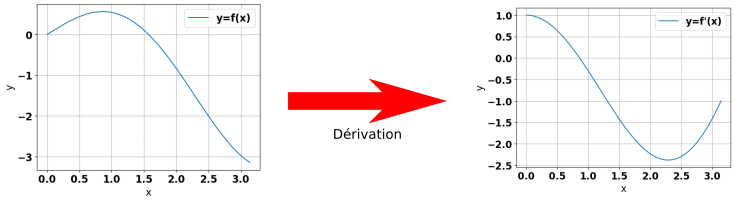

Mais dans l'autre sens ? Quand je connais la dérivée de $f$, comment je remonte à cette fonction $f$ ?

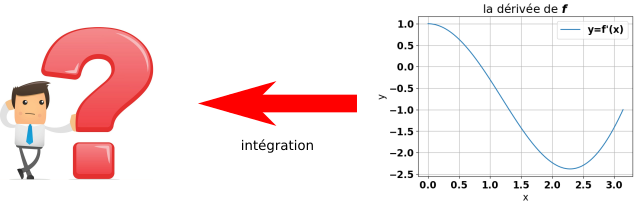

Et oui, c'est généralement beaucoup plus compliqué dans ce sens là. Et c'est justement à cela que l'on va répondre à l'aide du module Scipy de python.

Euh, il oublierait pas quelque chose le prof, par hasard ? Si, si ... Et même 2 choses importantes en fait.

1) **la constante d'intégration ou la notion de valeur initiale**

Et oui, vous savez que la dérivée d'une constante est nulle. Du coup, quand on effectue l'opération inverse en intégrant une équation différentielle, la fonction résultante sera calculée à une constante près.

Mais comment diable connaître cette constante ? Pour bien poser un problème avec une équation différentielle, il faut non seulement donner la fonction dérivée $g$ comme en début de ce cours, mais il faut aussi donner la valeur de la fonction $f$ en un point. C'est cette valeur qui va forcer la valeur de la constante d'intégration.

2) **Le domaine d'intégration**

Quand on veut intégrer une équation différentielle, on le fait sur un domaine de $\mathbb{R}$. Autant en mathématiques pures, on peut résoudre sur l'ensemble $\mathbb{R}$ ou alors un sous-ensemble de $\mathbb{R}$ comme par exemple $\mathbb{R}^*-\lbrace1\rbrace$. Autant avec un ordinateur, les choses se compliquent un peu car n'importe quel sous-ensemble de $\mathbb{R}$ contient une infinité de valeurs, ce qu'un ordinateur ne peut en aucun cas restituer car il a une mémoire fini, une précision finie et votre durée de vie est finie ! 
Il faut donc faire des choix en acceptant que l'ordinateur fournisse des résultats de toute façon moins précis que les mathématiques. Ce choix consiste à "tronçonner" le domaine d'intégration à une série de valeurs prises sur ce domaine. Le vrai nom de se tronçannage du domaine de calcul est la discrétisation.





# Un exemple facile pour mieux comprendre 

## Le Problème

Nous allons intégrer mathématiquement une équation différentielle très simple. Posons le problème proprement.

Si vous avez bien suivi ce qui précède, trois éléments sont constitutifs de la définition propre d'une équation différentielle.

- L'équation \:
$$ \dfrac{df}{dx}=2$$
- La condition initiale \: $ f(0)= -1 $
- Le domaine de résolution \: $[0,2]$

## Résolution analytique

La dérivée étant constante et égale à 2, on sait que la solution est
$$ f(x)=2x+C$$
où $C$ est la fameuse constante d'intégration. C'est la condition initiale qui va nous aider à la déterminer. 
$$ f(0)=-1 ⇒ -1 = 2⋅0 = C $$
On obtient donc $C = -1$.

Au final, on a donc $f(x)= 2x-1$

On se moque pas de nous là ? Le domaine d'intégration n'a servi à rien. C'est pas faux comme dirait Perceval (ref à Kaamelott). Mais c'est parce qu'ici, vous avez peut-être remarqué qu'on n'a pas utilisé d'ordinateur pour trouver la solution. Et oui, dans certains cas, on n'a pas besoin d'un ordinateur pour intégrer une équation différentielle. Dans ce cas, le domaine de résolution n'a pas à être découpé. 

## Résolution numérique en utilisant `odeint` du module `scipy.integrate`

Nous allons résoudre ce même problème mais cette fois avec un ordinateur en utilisant python et en particulier, l'outil `odeint` du module `scipy.integrate`. Ce nom `odeint` peut sembler bizarre mais en fait, ode vient de la traduction en anglais d'équation différentielle ordinaire : Ordinary Differential Equation dont on reconnaît l'acronyme ODE. Et int vient directement de l'anglais integration  qui veut dire intégration 😀.









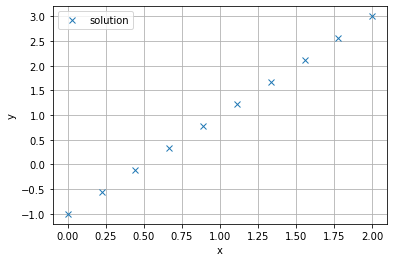

In [2]:
from pylab import *
from scipy.integrate import *

def deriv(f,x): #fonction retournant la valeur de la dérivée de f.
  return 2

borneGauche = 0 #borne gauche de l'intervalle de résolution
borneDroite = 2 #borne droite de l'intervalle de résolution
npoints = 10 #nombre de points de discrétisation
x=linspace(borneGauche,borneDroite,npoints) #Discrétisation de l'intervalle de résolution
fIni=-1 #Valeur initiale 
res=odeint(deriv,fIni,x) #appel de odeint
plot(x,res,'x',label="solution") # Tracé du résultat
xlabel('x')
ylabel('y')
legend()
grid()

Commentons ces lignes plus en avant.

La fonction `deriv` est une fonctiont le but est de retourner la valeur de la dérivée de $f$ à partir de la valeur de $f$ et de $x$. Cela correspond à la fonction $g$ du début de ce cours. ATTENTION \: il faut mettre f et x dans l'ordre respectivement en 1ère et 2ième position.

`x=linspace(borneGauche,borneDroite,npoints)` permet de discrétiser l'intervalle $[0,2]$ de résolution en 10 points. 

`fIni=-1` affecte à la variable xini la valeur de la fonction $f$, solution de l'équation différentielle, nécessairement pour la borne gauche de l'intervalle.

`res=odeint(deriv,fIni,x)` est la clé de la résolution. On y fait appel à la fonction odeint. Vous pouvez constater qu'elle a 3 paramètres qui correspondent aux 3 points que je vous ai dit nécessaire pour poser une équation différentielle ordinaire : deriv correspond à définir comment on calcule la dérivée, `fIni` la valeur initiale et `x` contient l'intervalle de résolution discrétisé. `odeint` renvoie un résultat que l'on affecte à la variable `res`. Ce résultat contient les valeurs de $f$ pour toutes les valeurs de $x$ définies par le `linspace`. 


## On se moque de nous ? On n'a pas la solution mathématique !

Vous n'avez pas tort. Comme, je vous l'ai dit plus haut, les ordinateurs, même les plus puissants, ne peuvent donner la solution autrement que par une série de valeurs pour un nombre de points finis. Si vous voulez la solution en plus de points, il faut augmenter la valeur de npoints. 

Précisions \: Augmenter le nombre de points, `npoints`, ne changera pas la précision du calcul car "à l'intérieur" de odeint, il y a un algorithme qui règle automatiquement quels doivent être les vrais points de discrétisation. Mais, nous n'entrerons pas ici dans ces détails beaucoup plus durs à comprendre.

Toujours est-il que d'avoir la valeur de $f$ pour une série de valeurs de $x$ se prête très bien à une représentation graphique comme vous avez pu le voir. D'ailleurs, plutôt que de représenter la solution sous la forme de point, j'aurais très bien pu utiliser \:



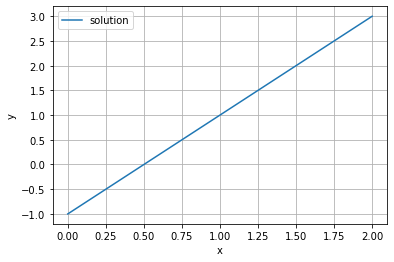

In [3]:
plot(x,res,label="solution") # Tracé du résultat
xlabel('x')
ylabel('y')
legend()
grid()

Dans ce cas, les points ne sont pas représentés et des segments de droite sont tracés entre chaque points de la solution. Dans le cas présent, ça tombe bien puisque le résultat est une droite comme nous l'avons vu mathématiquement.

# Un exemple de la vraie vie du chimiste (c'est pas trop tôt !)

Considérons la réaction \:

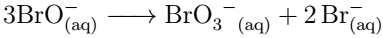



Cette réaction est d'ordre 2 par rapport à $\textrm{BrO}^-$. On peut donc écrire

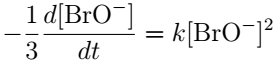

Sachant qu'à un instant donné, on initie cette réaction dans un bécher avec une concentration $[\textrm{BrO}^-]_0 = 10^{-1}$ mol.L$^{-1}$ et que k = 5.10$^{-2}$ mol$^{-1}$.L.s$^{-1}$. Quelle est l'évolution de la concentration $[\textrm{BrO}^-]$ durant les 5 premières minutes de réaction ?

Dans le cas présent, la fonction inconnue est $[\textrm{BrO}^-]$ que nous appellerons C dans le programme. On peut alors récrire l'EDO sous la forme
$$ \dfrac{dC}{dt}=-3kC^2$$


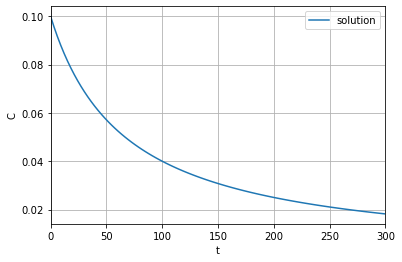

In [4]:
from pylab import *
from scipy.integrate import *

k=5e-2

def der(C,t): #fonction retournant la valeur de la dérivée de f.
  return -3*k*C**2

borneGauche = 0 #borne gauche de l'intervalle de résolution
borneDroite = 300 #borne droite de l'intervalle de résolution
npoints = 100 #nombre de points de discrétisation
t=linspace(borneGauche,borneDroite,npoints) #Discrétisation de l'intervalle de résolution
C0=1e-1 #Valeur initiale 
res=odeint(der,C0,t) #appel de odeint
plot(t,res,label="solution") # Tracé du résultat
xlabel('t')
ylabel('C')
xlim(borneGauche,borneDroite)
legend()
grid()

In [2]:
vID.end(cwd0)

**Fin à:** Wednesday 16 November 2022, 21:48:38  
**Durée:** 00:01:57 638ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>